In [847]:
import os
import numpy as np
import matplotlib.pyplot as graph

In [848]:
LEARNING_RATE = 0.1
MAX_ITERATION = int(1E6)
MIN_COST_DIFFERENCE = 1E-5

The following sigmoid function is used for hypothesis:

$g_\theta(x) = \frac{1}{1+e^{-h_\theta(x)}}$

Where $h_\theta(x)$ is given by,

$h_\theta(x) = \theta_0x_0 + \theta_1x_1 + ... + \theta_nx_n$

<br><br>
And for the Cost Function or Log Loss Function,

$
J(\theta) = -\frac{1}{m}(\sum_{i=0}^{m}y^{(i)}\log(g_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - (g_\theta(x^{(i)}))))
$

Where,

$m$ = Total Dataset

In [849]:
def read_csv(file1, file2):
    if not os.path.exists(file1):
        raise FileNotFoundError(f"{file1} not found.")
    
    if not os.path.exists(file2):
        raise FileNotFoundError(f"{file2} not found")
    
    x = []
    y = []
    with open(file1) as x_dataset, open(file2) as y_dataset:
        for x_data, y_data in zip(x_dataset, y_dataset):
            x.append(list(map(float, x_data.strip().split(","))))
            y.append(float(y_data.strip()))

    return np.array(x), np.array(y)

def train(feature, target, theta, cost):
    for i in range(MAX_ITERATION):
        hypothesis = feature @ theta
        prediction = 1 / (1 + np.exp(-hypothesis))

        error = prediction - target
        gradient = (feature.T @ error) / len(feature)

        theta -= LEARNING_RATE * gradient

        prediction = np.clip(prediction, 1e-15, 1 - 1e-15) # To prevent 0 in log(0) :)
        curr_cost = -(np.dot(target, np.log(prediction)) + np.dot(1 - target, np.log(1 - prediction))) / len(target)

        cost.append(curr_cost)

        # Break if reached `MIN_COST_DIFFERENCE` or the cost is increasing
        if abs(cost[-1] - cost[-2]) <= MIN_COST_DIFFERENCE:
            print("Minimum cost difference reached.")
            break
        elif cost[-1] > cost[-2]:
            print("Cost is increasing")
            break

    return theta, cost

def standardize(feature):
    return (feature - np.mean(feature, axis=0)) / np.std(feature, axis=0)

In [850]:
feature, target = read_csv("./datasets/logisticX.csv",
                           "./datasets/logisticY.csv")

feature = standardize(feature)
feature = np.c_[np.ones(len(feature)), feature]

cost = [float('inf')]
theta = np.zeros(feature.shape[1])

In [851]:
theta, cost = train(feature, target, theta, cost)

Minimum cost difference reached.


In [852]:
for i in range(len(theta)):
    print(f"theta_{i} = {round(theta[i], 3)}")

print(f"\nFinal Cost = {round(cost[-1], 3)}")

theta_0 = 0.267
theta_1 = 2.229
theta_2 = -2.314

Final Cost = 0.231


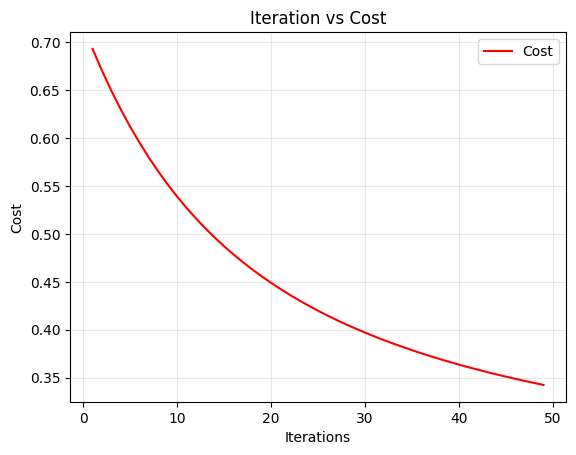

In [853]:
graph.title("Iteration vs Cost")
graph.xlabel("Iterations")
graph.ylabel("Cost")

graph.plot(range(50), cost[:50], label="Cost", color="red")

graph.legend()
graph.grid(alpha=0.3)

graph.show()

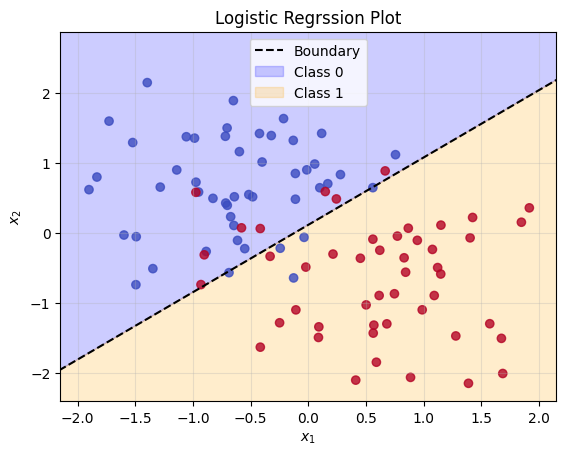

In [854]:
x1 = feature[:, 1].flatten()
x2 = feature[:, 2].flatten()

x1_values = np.linspace(min(x1), max(x1), len(x1))

x2_values = -(theta[0] + theta[1] * x1_values) / theta[2]

graph.xlim(min(x2), max(x2))
graph.ylim(min(x1), max(x1))

graph.xlabel("$x_1$")
graph.ylabel("$x_2$")
graph.title("Logistic Regrssion Plot")
# graph.axvline(0, linestyle="--", color="black", linewidth=.8)
# graph.axhline(0, linestyle="--", color="black", linewidth=.8)

graph.plot(x1_values, x2_values, color='black', linestyle="--", label="Boundary")

graph.fill_between(x1_values, x2_values, 3, color='blue', alpha=0.2, label="Class 0")
graph.fill_between(x1_values, x2_values, -3, color='orange', alpha=.2, label="Class 1")

graph.scatter(x1, x2, c=target, cmap='coolwarm', alpha=.8)

graph.grid(alpha=.3)
graph.legend()
graph.show()

`QN` Introduce 2 new independent variables in the dataset and set their values equal to the square of the original 2 variables. Again train the dataset using logistic regression and plot the data points and decision boundary for this new dataset.

In [855]:
new_feature =  np.c_[feature, np.square(feature[:, 1:])]
new_target = target[:]

new_cost = [float('inf')]
new_theta = np.zeros(new_feature.shape[1])

In [856]:
new_theta, new_cost = train(new_feature, new_target, new_theta, new_cost)

Minimum cost difference reached.


In [890]:
for i in range(len(new_theta)):
    print(f"theta_{i} = {round(new_theta[i], 3)}")

print(f"\nFinal Cost = {round(new_cost[-1], 3)}")

theta_0 = 0.222
theta_1 = 2.322
theta_2 = -2.308
theta_3 = 0.304
theta_4 = -0.187

Final Cost = 0.228


In [878]:
tp = 0
tn = 0
fn = 0
fp = 0

predicted = (1 / (1 + np.exp(-(feature @ theta)))) < 0.5
actual = target == 0

for i in range(len(predicted)):
    if predicted[i] and actual[i]:
        tp += 1
    elif predicted[i] and not actual[i]:
        fp += 1
    elif not predicted[i] and actual[i]:
        fn += 1
    else:
        tn += 1

In [880]:
print(f"TP = {tp}")
print(f"TN = {tn}")
print(f"FN = {fn}")
print(f"FP = {fp}")

TP = 45
TN = 42
FN = 5
FP = 8


In [889]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)

print(f"Recall = {recall}")
print(f"Accuracy = {accuracy}")
print(f"F1 Score = {round(f1_score, 2)}")
print(f"Precision = {round(precision, 2)}")

print("\nHere the metrics are calculated on training datasets :(")

Recall = 0.9
Accuracy = 0.87
F1 Score = 0.87
Precision = 0.85

Here the metrics are calculated on training datasets :(
